Topic:        Challenge Set 5

Subject:      Movie data Regression Analysis

Date:         11/21/2017

Name:         Brendan Fitzpatrick

In [10]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [11]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

In [12]:
df = pd.read_csv('2013_movies.csv', parse_dates={'Date':['ReleaseDate']})

In [13]:
df.head()
df.shape
df.info()
df.describe()

,Date,Title,Budget,DomesticTotalGross,Director,Rating,Runtime
0,2013-11-22,The Hunger Games: Catching Fire,1.300e+08,424668047,Francis Lawrence,PG-13,146
1,2013-05-03,Iron Man 3,2.000e+08,409013994,Shane Black,PG-13,129
2,2013-11-22,Frozen,1.500e+08,400738009,Chris BuckJennifer Lee,PG,108
3,2013-07-03,Despicable Me 2,7.600e+07,368061265,Pierre CoffinChris Renaud,PG,98
4,2013-06-14,Man of Steel,2.250e+08,291045518,Zack Snyder,PG-13,143


(100, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Date                  100 non-null datetime64[ns]
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.5+ KB


,Budget,DomesticTotalGross,Runtime
count,8.900e+01,1.000e+02,100.000
mean,7.475e+07,1.006e+08,112.260
std,5.942e+07,8.740e+07,18.191
min,2.500e+06,2.557e+07,75.000
25%,2.800e+07,4.270e+07,98.000
50%,5.500e+07,6.954e+07,112.000
75%,1.100e+08,1.205e+08,123.000
max,2.250e+08,4.247e+08,180.000


**Challenge 1**

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [14]:
df['ones'] = 1

Make a model function

In [17]:
def train_model(dataframe, explanatory_vars, outcome_vars):
    X = dataframe[explanatory_vars]
    Y = dataframe[outcome_vars]
    model = sm.OLS(Y, X).fit()
    return model

In [18]:
model1 = train_model(df, "ones", "DomesticTotalGross")

In [19]:
model1.summary()

/home/bf2931/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 22 Nov 2017   Prob (F-statistic):                nan
Time:                        15:31:32   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ones        1.006e+08   8.74e+06     11.510      0.000    8.33e+07    1.18e+08
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
def plot_predictions(X, Y, model):
    fig = plt.figure()
    plt.plot(model.predict(X), Y, "go")
    plt.plot(Y, Y, "m")
    plt.xlabel("Predicted Outcome")
    plt.ylabel("Actual Outcome")
    plt.axis([0, 450000000,0, 450000000])
    plt.annotate('Mean of Predicted', xy=(np.mean(Y),0), xytext=(200000000, 100000000),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
    plt.show()

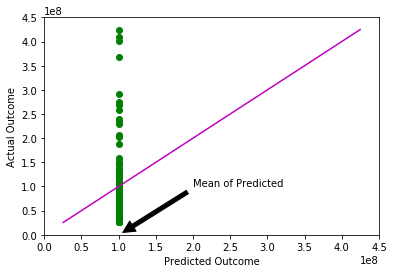

In [60]:
plot_predictions(df.ones, df.DomesticTotalGross, model1)

We can see from the chart that using a constant in a regression just finds the mean of the range and sets that as the predicted for every data point

In [68]:
def plot_residuals(X, Y, model, dataframe):
    dataframe['residuals'] = model.predict(dataframe[X])-dataframe[Y]
    dataframe['residuals'].hist(bins=20)

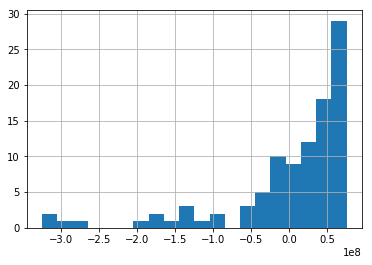

In [69]:
plot_residuals('ones', 'DomesticTotalGross', model1, df)

The distribution is skewed negatively, which means it is left-tailed

**Challenge 2**

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [57]:
df.Budget.fillna(df.Budget.mean(), inplace=True)

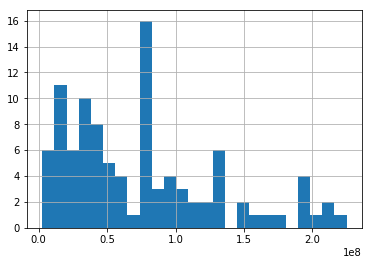

In [58]:
df.Budget.hist(bins=25)

In [62]:
model2 = train_model(df, 'Budget', 'DomesticTotalGross')

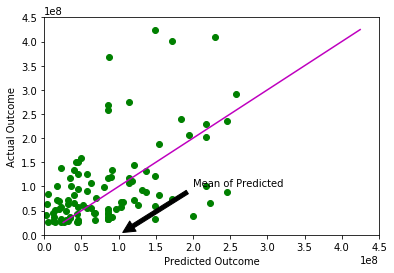

In [66]:
plot_predictions(df.Budget, df.DomesticTotalGross, model2)

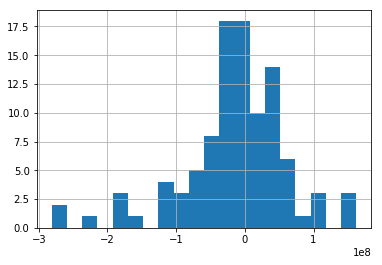

In [72]:
plot_residuals('Budget', 'DomesticTotalGross', model2, df)

Residuals look normally distribution, which is what we want.

In [77]:
def scatter_plot(X, Y, dataframe):
    sns.lmplot(x=X, y=Y, data=dataframe)
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.show()

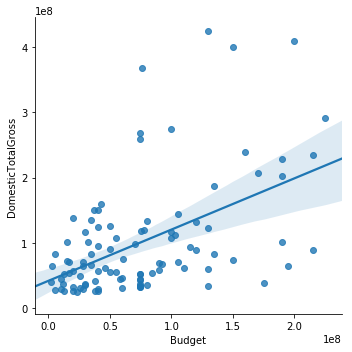

In [78]:
scatter_plot("Budget", "DomesticTotalGross", df)

We can see that there is a much clearer correlation going on here

In [81]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     179.8
Date:                Wed, 22 Nov 2017   Prob (F-statistic):           5.44e-24
Time:                        16:04:08   Log-Likelihood:                -1960.7
No. Observations:                 100   AIC:                             3923.
Df Residuals:                      99   BIC:                             3926.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Budget         1.1453      0.085     13.410      0.000       0.976       1.315
==============================================================================
Omnibus:                       19.422   Durbin-Watson:                   1.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.725
Skew:                           0.849   Prob(JB):                     2.13e-07
Kurtosis:                       5.119   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our low t-score and higher R-squared shows that is the case.

**Challenge 3**

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [87]:
df= df.join(pd.get_dummies(df.Rating))

In [89]:
df.head()

,Date,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ones,residuals,G,PG,PG-13,R
0,2013-11-22,The Hunger Games: Catching Fire,1.300e+08,424668047,Francis Lawrence,PG-13,146,1,-2.758e+08,0,0,1,0
1,2013-05-03,Iron Man 3,2.000e+08,409013994,Shane Black,PG-13,129,1,-1.800e+08,0,0,1,0
2,2013-11-22,Frozen,1.500e+08,400738009,Chris BuckJennifer Lee,PG,108,1,-2.289e+08,0,1,0,0
3,2013-07-03,Despicable Me 2,7.600e+07,368061265,Pierre CoffinChris Renaud,PG,98,1,-2.810e+08,0,1,0,0
4,2013-06-14,Man of Steel,2.250e+08,291045518,Zack Snyder,PG-13,143,1,-3.336e+07,0,0,1,0


In [91]:
model3 = train_model(df, ['G', 'PG', 'PG-13', 'R'], 'DomesticTotalGross')

In [94]:
plot_predictions(df[['G', 'PG', 'PG-13', 'R']], 'DomesticTotalGross', model2)

ValueError: shapes (100,4) and (1,) not aligned: 4 (dim 1) != 1 (dim 0)

 **Challenge 4**

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.